In [1]:
!pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147775 sha256=dddd61ab544b72e3dd82ed3376ef57d196f963ec4d008826a72aa25152e429b2
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


In [2]:
file_name_vanilla = "many_games_vanilla (8).pgn"
file_name_trained = "many_games_trained (4).pgn"

In [8]:
# function to convert list of values into course-grained plot
import numpy as np
import matplotlib.pyplot as plt

def plot_avg_over_time(values, grain_size, title, xlabel, ylabel, label=None):
  this_sum = 0
  counter = 0
  this_avg = 0
  avgs = []
  for result in values:
    this_sum += result
    counter += 1
    if counter == grain_size:
      this_avg = this_sum / grain_size
      avgs.append(this_avg)
      this_sum = 0
      this_avg = 0
      counter = 0

  num_data_points = np.linspace(grain_size, len(values), int(len(values) / grain_size))

  plt.plot(num_data_points, avgs, label=label)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)


def plot_sum_over_time(values, grain_size, title, xlabel, ylabel, label=None):
  this_sum = 0
  counter = 0
  sums = []
  for result in values:
    this_sum += result
    counter += 1
    if counter == grain_size:
      sums.append(this_sum)
      this_sum = 0
      counter = 0

  num_data_points = np.linspace(grain_size, len(values), int(len(values) / grain_size))

  plt.plot(num_data_points, sums, label=label)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

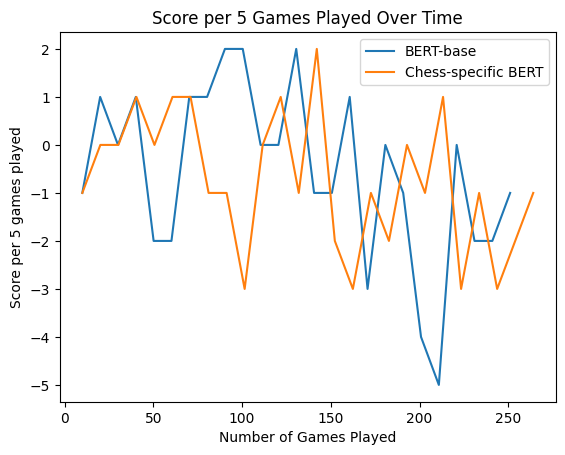

In [5]:
import chess.pgn

def get_game_results(pgn_file_path):
    results = []
    with open(pgn_file_path, "r", encoding="utf-8") as pgn:
        while True:
            game = chess.pgn.read_game(pgn)
            if game is None:
                break
            result_str = game.headers.get("Result")
            if result_str == "1-0":
                results.append(1)
            elif result_str == "0-1":
                results.append(-1)
            elif result_str == "1/2-1/2":
                results.append(0)
            else:
                results.append(None)
    return results

game_results_vanilla = get_game_results(file_name_vanilla)
game_results_trained = get_game_results(file_name_trained)

plot_sum_over_time(game_results_vanilla, 10, title = "Score per 5 Games Played Over Time",
                   xlabel = "Number of Games Played", ylabel = "Score per 5 games played", label="BERT-base")
plot_sum_over_time(game_results_trained, 10, title = "Score per 5 Games Played Over Time",
                   xlabel = "Number of Games Played", ylabel = "Score per 5 games played", label="Chess-specific BERT")

plt.legend()


[214.0, 173.0, 166.0, 446.0, 271.0, 179.5, 58.0, 98.0, 219.0, 203.0, 365.0, 250.5, 277.0, 397.0, 316.5, 304.5, 173.0, 158.5, 122.5, 385.5, 176.0, 188.0, 193.0, 250.5, 419.0, 126.5, 578.5, 305.5, 277.5, 230.5, 270.5, 499.5, 299.5, 129.0, 276.0, 165.0, 316.5, 295.5, 87.5, 258.5, 170.0, 122.0, 180.0, 339.0, 270.0, 237.5, 77.5, 89.5, 139.5, 402.0, 239.0, 437.5, 50.5, 60.5, 265.5, 182.5, 241.5, 74.5, 45.5, 71.5, 19.5, 337.0, 372.0, 465.0, 370.5, 142.0, 209.0, 47.5, 143.0, 309.5, 188.0, 254.5, 199.0, 295.0, 44.5, 309.5, 152.0, 104.0, 296.0, 44.5, 160.5, 245.5, 57.0, 259.0, 248.0, 244.0, 380.0, 310.5, 319.0, 150.0, 181.0, 246.0, 303.0, 57.0, 214.0, 120.5, 347.5, 39.0, 243.5, 278.0, 62.5, 70.5, 187.5, 288.5, 226.0, 260.0, 393.5, 254.0, 158.5, 299.5, 366.0, 186.0, 150.0, 235.5, 221.5, 236.0, 215.0, 289.5, 72.5, 205.5, 180.0, 255.0, 110.5, 190.0, 234.0, 253.0, 225.0, 241.5, 368.0, 326.0, 185.0, 327.0, 273.5, 191.0, 354.5, 278.5, 81.5, 54.5, 333.5, 335.5, 229.0, 454.5, 305.5, 219.5, 238.5, 280.5,

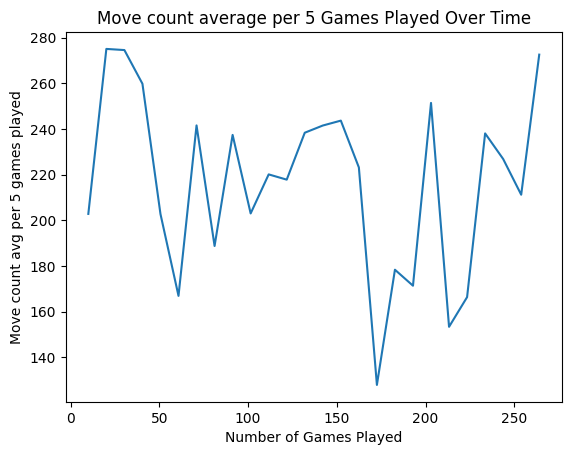

In [22]:
import chess.pgn

def get_move_counts_from_pgn(pgn_path):
    move_counts = []
    with open(pgn_path, "r") as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break  # no more games in file

            # count full moves (a pair of white and black moves)
            board = game.board()
            move_count = 0
            for move in game.mainline_moves():
                board.push(move)
                # add each half-move (move by one side)
                move_count += 0.5

            move_counts.append(move_count)
    return move_counts

move_counts = get_move_counts_from_pgn(file_name_trained)
print(move_counts)

plot_avg_over_time(move_counts, 10, title = "Move count average per 5 Games Played Over Time",
                   xlabel = "Number of Games Played", ylabel = "Move count avg per 5 games played")

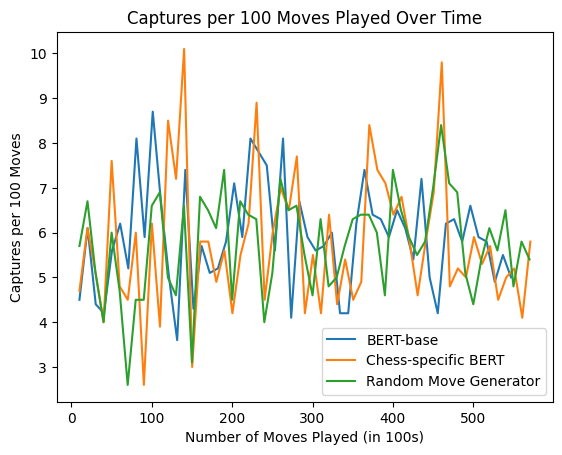

In [17]:
import chess.pgn

def count_white_captures_per_100_moves(pgn_path, black=False):
    capture_counts = []
    white_moves = 0
    white_captures = 0

    with open(pgn_path, "r") as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break  # no more games in file

            board = game.board()
            for i, move in enumerate(game.mainline_moves()):

                if black == False:
                  if i % 2 == 0:  # White's turn
                      move_str = board.san(move)
                      if 'x' in move_str:  # check for captures with 'x'
                          white_captures += 1
                      white_moves += 1
                  board.push(move)

                # do the same thing for Black's captures
                else:
                  if i % 2 == 1:  # Black's turn
                      move_str = board.san(move)
                      if 'x' in move_str:
                          white_captures += 1
                      white_moves += 1
                  board.push(move)

                # every 100 moves, record the number of captures made by White (or Black)
                if white_moves >= 100:
                    capture_counts.append(white_captures)
                    white_moves = 0
                    white_captures = 0

    # leftover moves
    if white_moves > 0:
        capture_counts.append(white_captures)

    return capture_counts

captures_counts_vanilla = count_white_captures_per_100_moves(file_name_vanilla)
captures_counts_trained = count_white_captures_per_100_moves(file_name_trained)
captures_counts_RMG = count_white_captures_per_100_moves(file_name_trained, black=True)

plot_avg_over_time(captures_counts_vanilla, 10, title = "Captures per 100 Moves Played Over Time",
                   xlabel = "Number of Moves Played (in 100s)", ylabel = "Captures per 100 Moves",label="BERT-base")

plot_avg_over_time(captures_counts_trained, 10, title = "Captures per 100 Moves Played Over Time",
                   xlabel = "Number of Moves Played (in 100s)", ylabel = "Captures per 100 Moves", label="Chess-specific BERT")

plot_avg_over_time(captures_counts_RMG, 10, title = "Captures per 100 Moves Played Over Time",
                   xlabel = "Number of Moves Played (in 100s)", ylabel = "Captures per 100 Moves", label="Random Move Generator")

plt.legend()

[0.06, 0.06, 0.11, 0.19, 0.23, 0.1, 0.05, 0.07, 0.07, 0.33, 0.04, 0.19, 0.12, 0.25, 0.14, 0.06, 0.45, 0.26, 0.18, 0.47, 0.57, 0.3, 0.13, 0.04, 0.04, 0.04, 0.19, 0.11, 0.1, 0.03, 0.19, 0.15, 0.02, 0.05, 0.05, 0.15, 0.26, 0.29, 0.17, 0.1, 0.44, 0.31, 0.02, 0.55, 0.48, 0.25, 0.11, 0.04, 0.33, 0.07, 0.07, 0.11, 0.1, 0.1, 0.08, 0.03, 0.06, 0.04, 0.14, 0.1, 0.04, 0.03, 0.05, 0.03, 0.09, 0.13, 0.09, 0.09, 0.07, 0.09, 0.02, 0.06, 0.09, 0.08, 0.11, 0.02, 0.06, 0.11, 0.13, 0.1, 0.12, 0.06, 0.08, 0.07, 0.13, 0.08, 0.21, 0.16, 0.06, 0.09, 0.42, 0.06, 0.33, 0.41, 0.41, 0.16, 0.31, 0.32, 0.22, 0.09, 0.07, 0.21, 0.15, 0.06, 0.09, 0.29, 0.17, 0.21, 0.03, 0.09, 0.11, 0.05, 0.12, 0.16, 0.14, 0.24, 0.02, 0.08, 0.04, 0.11, 0.06, 0.16, 0.1, 0.1, 0.05, 0.06, 0.17, 0.34, 0.07, 0.16, 0.11, 0.1, 0.1, 0.04, 0.12, 0.09, 0.07, 0.12, 0.04, 0.14, 0.1, 0.02, 0.07, 0.1, 0.05, 0.14, 0.04, 0.11, 0.16, 0.16, 0.36, 0.57, 0.14, 0.19, 0.14, 0.34, 0.04, 0.05, 0.07, 0.1, 0.08, 0.31, 0.12, 0.12, 0.06, 0.06, 0.09, 0.15, 0.16, 

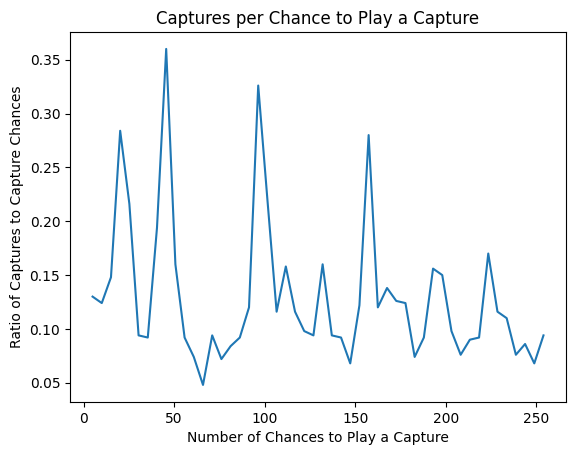

In [14]:
import chess.pgn
import chess.engine

# function to check if a move is a capture
def is_capture(board, move):
    return board.is_capture(move)

# function to get the percentage of captures by White per 100 chances
def capture_ratio_per_100_chances(pgn_path):
    capture_counts = []
    chances_counts = []
    capture_ratios = []

    with open(pgn_path, "r") as pgn_file:
        white_capture_chances = 0
        white_captures = 0
        chances_for_game = 0
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break

            board = game.board()

            for i, move in enumerate(game.mainline_moves()):
                if i % 2 == 0:
                    legal_moves = list(board.legal_moves)
                    captures = [possible_move for possible_move in legal_moves if is_capture(board, possible_move)]

                    # check if there's a chance to capture
                    if captures:
                        white_capture_chances += 1

                    # check if White actually captures a piece
                    if is_capture(board, move):
                        white_captures += 1

                    board.push(move)

                else:
                  board.push(move)

                # every 100 chances, record the capture ratio
                if white_capture_chances >= 100:
                    capture_ratio = white_captures / white_capture_chances if white_capture_chances > 0 else 0
                    capture_ratios.append(capture_ratio)
                    capture_counts.append(white_captures)
                    chances_counts.append(white_capture_chances)
                    white_capture_chances = 0
                    white_captures = 0
                    chances_for_game = 0

    # leftover chances
    if chances_for_game > 0:
        capture_ratio = white_captures / white_capture_chances if white_capture_chances > 0 else 0
        capture_ratios.append(capture_ratio)
        capture_counts.append(white_captures)
        chances_counts.append(white_capture_chances)

    return capture_ratios, capture_counts, chances_counts


ratios, captures, chances = capture_ratio_per_100_chances(file_name_trained)
print(ratios)
print(captures)
print(chances)
print(sum(captures))

plot_avg_over_time(ratios, 5, title = "Captures per Chance to Play a Capture",
                   xlabel = "Number of Chances to Play a Capture (in 100s)", ylabel = "Ratio of Captures to Capture Chances")

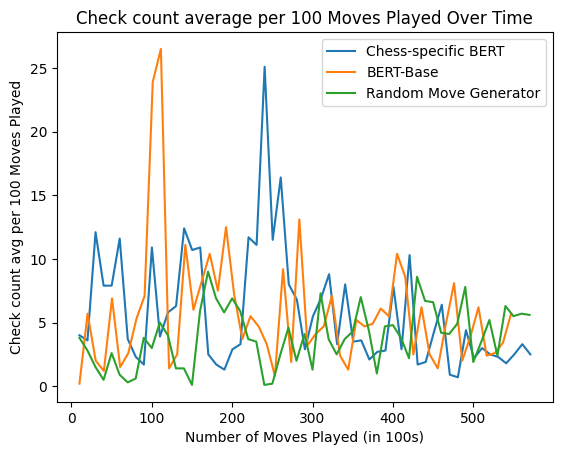

In [19]:
import chess.pgn

def count_white_checks_per_100_moves(pgn_path, black=False):
    check_counts = []
    white_moves = 0
    white_checks = 0

    with open(pgn_path, "r") as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break

            board = game.board()
            for i, move in enumerate(game.mainline_moves()):

                if black==False:
                    if i % 2 == 0:  # White's turn
                        move_str = board.san(move)
                        if '+' in move_str or '#' in move_str:  # check for check or checkmate
                            white_checks += 1
                        white_moves += 1
                    board.push(move)  # Apply the move to the board

                # calculate for random move generator
                else:
                  if i % 2 == 1:  # Black's turn
                      move_str = board.san(move)
                      if '+' in move_str or '#' in move_str:
                          white_checks += 1
                      white_moves += 1
                  board.push(move)

                # every 100 moves, record the number of checks made by White (or Black)
                if white_moves >= 100:
                    check_counts.append(white_checks)
                    white_moves = 0
                    white_checks = 0

    # leftover moves
    if white_moves > 0:
        check_counts.append(white_checks)

    return check_counts

check_counts_trained = count_white_checks_per_100_moves(file_name_trained)
check_counts_vanilla = count_white_checks_per_100_moves(file_name_vanilla)
check_counts_random = count_white_checks_per_100_moves(file_name_trained, black=True)


plot_avg_over_time(check_counts_trained, 10, title = "Check count average per 100 Moves Played Over Time",
                   xlabel = "Number of Moves Played (in 100s)", ylabel = "Check count avg per 100 Moves Played", label="Chess-specific BERT")

plot_avg_over_time(check_counts_vanilla, 10, title = "Check count average per 100 Moves Played Over Time",
                   xlabel = "Number of Moves Played (in 100s)", ylabel = "Check count avg per 100 Moves Played", label="BERT-Base")

plot_avg_over_time(check_counts_random, 10, title = "Check count average per 100 Moves Played Over Time",
                   xlabel = "Number of Moves Played (in 100s)", ylabel = "Check count avg per 100 Moves Played", label="Random Move Generator")

plt.legend()


[0.12, 0.09, 0.07, 0.03, 0.01, 0.08, 0.08, 0.04, 0.03, 0.03, 0.04, 0.09, 0.21, 0.03, 0.03, 0.01, 0.41, 0.57, 0.2, 0.05, 0.05, 0.21, 0.06, 0.05, 0.13, 0.04, 0.08, 0.24, 0.2, 0.06, 0.05, 0.12, 0.01, 0.3, 0.21, 0.19, 0.28, 0.02, 0.08, 0.08, 0.04, 0.27, 0.02, 0.03, 0.0, 0.02, 0.02, 0.01, 0.03, 0.01, 0.05, 0.01, 0.03, 0.04, 0.04, 0.03, 0.02, 0.01, 0.0, 0.01, 0.1, 0.06, 0.19, 0.08, 0.05, 0.34, 0.38, 0.23, 0.05, 0.06, 0.02, 0.03, 0.01, 0.12, 0.2, 0.07, 0.09, 0.09, 0.06, 0.06, 0.08, 0.0, 0.06, 0.17, 0.27, 0.06, 0.05, 0.15, 0.11, 0.36, 0.39, 0.05, 0.07, 0.42, 0.32, 0.03, 0.1, 0.05, 0.04, 0.04, 0.04, 0.14, 0.43, 0.39, 0.09, 0.1, 0.05, 0.02, 0.09, 0.09, 0.01, 0.02, 0.04, 0.02, 0.01, 0.03, 0.04, 0.03, 0.09, 0.06, 0.04, 0.02, 0.07, 0.04, 0.04, 0.01, 0.12, 0.05, 0.0, 0.09, 0.08, 0.06, 0.28, 0.39, 0.31, 0.06, 0.13, 0.33, 0.17, 0.03, 0.66, 0.87, 0.53, 0.83, 0.04, 0.01, 0.0, 0.06, 0.02, 0.25, 0.61, 0.07, 0.08, 0.09, 0.25, 0.56, 0.1, 0.59, 0.06, 0.46, 0.04, 0.14, 0.21, 0.0, 0.02, 0.05, 0.09, 0.33, 0.03,

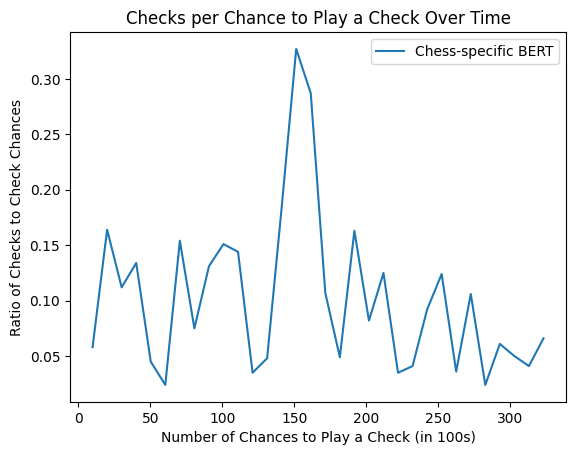

In [24]:
import chess.pgn
import chess.engine

# function to check if a move is a check
def is_check(board, move):
    board.push(move)
    in_check = board.is_check()
    board.pop()  # undo the move
    return in_check

# function to get the percentage of captures by White per 100 chances
def check_ratio_per_100_chances(pgn_path):
    check_counts = []
    chances_counts = []
    check_ratios = []
    white_check_chances = 0
    white_checks = 0
    chances_for_game = 0

    with open(pgn_path, "r") as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break

            board = game.board()

            for i, move in enumerate(game.mainline_moves()):
                if i % 2 == 0:
                    legal_moves = list(board.legal_moves)
                    checks = [possible_move for possible_move in legal_moves if is_check(board, possible_move)]

                    # check if there's a chance to check
                    if checks:
                        white_check_chances += 1

                    # Cceck if White actually plays a check
                    if is_check(board, move):
                        white_checks += 1

                    board.push(move)


                else:
                  board.push(move)

                # every 100 chances, record the check ratio
                if white_check_chances >= 100:
                    check_ratio = white_checks / white_check_chances if white_check_chances > 0 else 0
                    check_ratios.append(check_ratio)
                    check_counts.append(white_checks)
                    chances_counts.append(white_check_chances)
                    white_check_chances = 0
                    white_checks = 0
                    chances_for_game = 0

    # leftover chances
    if chances_for_game > 0:
        check_ratio = white_checks / white_check_chances if white_check_chances > 0 else 0
        check_ratios.append(check_ratio)
        check_counts.append(white_checks)
        chances_counts.append(white_check_chances)

    return check_ratios, check_counts, chances_counts


ratios, checks, chances = check_ratio_per_100_chances(file_name_trained)
print(ratios)
print(checks)
print(sum(checks))
print(chances)
print(sum(chances))

plot_avg_over_time(ratios, 10, title = "Checks per Chance to Play a Check Over Time",
                   xlabel = "Number of Chances to Play a Check (in 100s)", ylabel = "Ratio of Checks to Check Chances", label="Chess-specific BERT")

plt.legend()